https://medium.com/analytics-vidhya/time-series-forecasting-d611fa8ae6ca \
Nice article that talks about Time series data till ACF and PACF

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [28]:
df_ice_cream = pd.read_csv('ice_cream.csv')

In [29]:
df_ice_cream.head()

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636


In [30]:
#renaming the columns
df_ice_cream.rename(columns = {'DATE': 'date' , 'IPN31152N':'production'}, inplace = True)

In [31]:
#convert date column to datetime type
df_ice_cream['date'] = pd.to_datetime(df_ice_cream.date)

In [32]:
#set date as index for making plotting easier
df_ice_cream.set_index('date', inplace = True)

In [33]:
#taking subset of data like from 2010 onwards
df_ice_cream = df_ice_cream[pd.to_datetime('2010-01-01'):]

In [34]:
df_ice_cream.head()

,production
date,
2010-01-01,91.2895
2010-02-01,110.4994
2010-03-01,127.0971
2010-04-01,132.6468
2010-05-01,134.5576


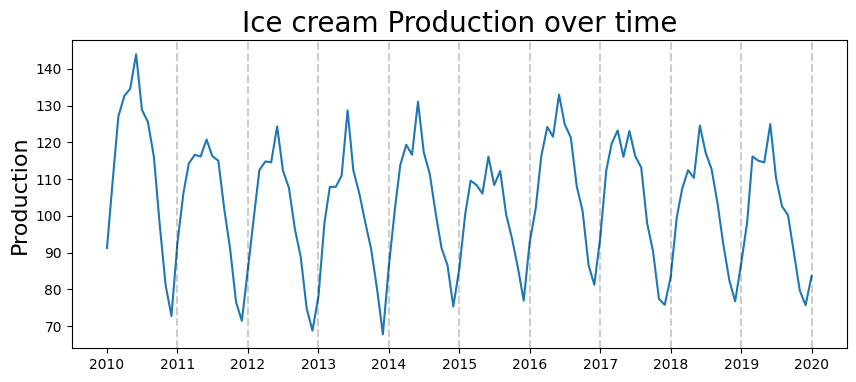

In [38]:
#plotting the data to see how the time series looks like
plt.figure(figsize = (10,4))
plt.plot(df_ice_cream.production)
plt.title('Ice cream Production over time', fontsize = 20)
plt.ylabel('Production', fontsize = 16)

# for plotting the segregation between years
for year in range(2011, 2021):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), color = 'k', linestyle = '--', alpha = 0.2)

Notice the above graph in every year close to mid there is a peak due to summers.

In 2015 suddenly there is a decrease in the production

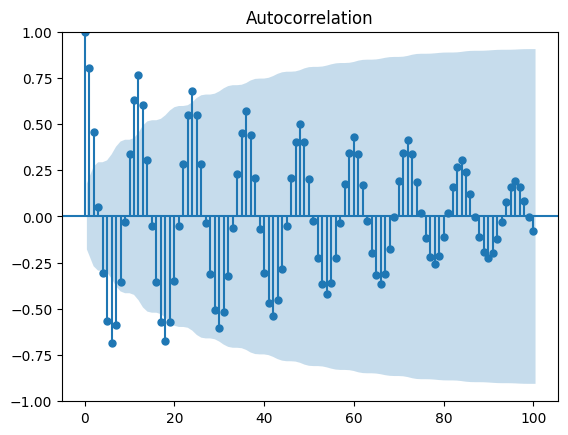

In [39]:
#ACF plot

acf_plot = plot_acf(df_ice_cream.production, lags=100)

There is cycle over time of high and low but eventually going to zero.\
The blue bars are error bands and anything within the blue bar is not statistically significant (Here from lag 30)\
If the ACF is decaying like here we are dealing with an Auto Regressive model (Remember regression fit for PACF )

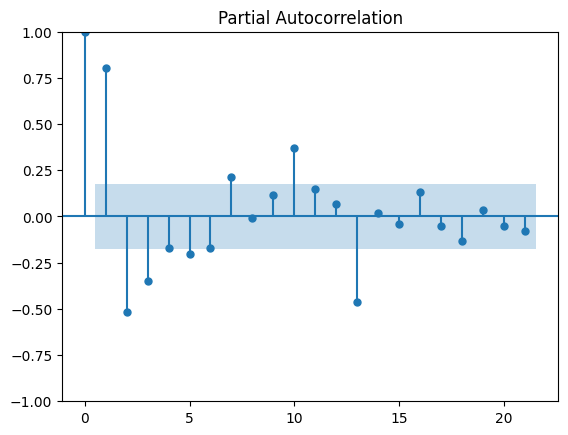

In [40]:
#Plotting the pacf
pacf_plot = plot_pacf(df_ice_cream.production)

Anything beyond the error bound is significant to us so we should start the auto-regressive model with lag 1,2,3,10,13 etc \
ACF and PACF does not give the end goal for our model just a starter to learn what our time series looks like